In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import joblib
import json
import os
from datetime import datetime


from MLPClassifier_modelling import select_feature_columns
from MLPClassifier_modelling import walk_forward_train_MLPClasifier_model
from MLPClassifier_modelling import train_model_MLPClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
model_name = "MLP_tbm10d" # ИМЯ МОДЕЛИ

In [3]:
# ==============================================================================
# ОСНОВНОЙ СКРИПТ МОДЕЛИРОВАНИЯ
# ==============================================================================

# --- ШАГ 1: Подготовка данных ---


data_folder = "../data/"
final_dataset_filename = 'moex_final_dataset.csv'
TARGET_COLUMN = 'tbm_10d' # Наша цель для предсказания!

# Загружаем финальный датасет
print(f"Загрузка данных из: {data_folder + final_dataset_filename}")
try:
    df = pd.read_csv(data_folder + final_dataset_filename)
    # if features_to_remove:
    #     df = df.drop(columns=features_to_remove)
    #     print(f"Удалено {len(features_to_remove)} неважных признаков.")


    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by='Date', inplace=True)
    df.reset_index(drop=True, inplace=True)
    print("Данные успешно загружены.")
except FileNotFoundError:
    print("ОШИБКА: Финальный датасет не найден.")
    raise


print(f"\nИсходный размер датасета: {len(df)} строк.")
df.dropna(subset=[TARGET_COLUMN], inplace=True)
df.reset_index(drop=True, inplace=True)
print(f"Размер датасета после фильтрации по CUSUM-событиям: {len(df)} строк.")


feature_cols = select_feature_columns(df)

X = df[feature_cols]
y = df[TARGET_COLUMN].astype(int)




print(f"\nЦелевая переменная (y): {TARGET_COLUMN}")
print(f"Количество признаков (X): {len(feature_cols)}")
print("Признаки:", feature_cols)

Загрузка данных из: ../data/moex_final_dataset.csv
Данные успешно загружены.

Исходный размер датасета: 15143 строк.
Размер датасета после фильтрации по CUSUM-событиям: 15143 строк.

Целевая переменная (y): tbm_10d
Количество признаков (X): 245
Признаки: ['sarimax_pred_1d_to_today', 'sarimax_pi_width_rel_1d', 'sarimax_pred_3d_to_today', 'sarimax_pi_width_rel_3d', 'sarimax_pred_5d_to_today', 'sarimax_pi_width_rel_5d', 'sarimax_failed', 'sma_3', 'sma_5', 'sma_7', 'sma_10', 'sma_15', 'sma_20', 'sma_30', 'sma_40', 'sma_50', 'sma_70', 'sma_100', 'sma_150', 'sma_200', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ADX_14', 'ADXR_14_2', 'DMP_14', 'DMN_14', 'rsi_5', 'rsi_7', 'rsi_14', 'rsi_21', 'rsi_30', 'rsi_50', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'STOCHh_14_3_3', 'willr_5', 'willr_7', 'willr_14', 'willr_21', 'willr_30', 'atr_5', 'atr_7', 'atr_14', 'atr_21', 'BBL_20_2.0_2.0', 'BBM_20_2.0_2.0', 'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0', 'bb_width_norm', 'relative_volume_5', 'rela

In [4]:
walk_forward_train_MLPClasifier_model(df, X, y)


Начинаем Walk-Forward валидацию (MLPClassifier) с 5 сплитами...

--- Сплит 1/5 ---
Размер обучающей выборки: 2528
Размер тестовой выборки: 2523
Обучение модели (MLPClassifier)...
Оценка модели...

Точность (Accuracy) на сплите 1: 0.3742
Детальный отчет по качеству:
              precision    recall  f1-score   support

   -1 (Sell)       0.33      0.19      0.24       720
    0 (Hold)       0.27      0.30      0.28       684
     1 (Buy)       0.45      0.54      0.49      1119

    accuracy                           0.37      2523
   macro avg       0.35      0.34      0.34      2523
weighted avg       0.37      0.37      0.36      2523

ROC AUC: {np.int64(-1): np.float64(0.5207913508350279), np.int64(0): np.float64(0.5025531133434457), np.int64(1): np.float64(0.4882736417588964)}

--- Сплит 2/5 ---
Размер обучающей выборки: 5051
Размер тестовой выборки: 2523
Обучение модели (MLPClassifier)...
Оценка модели...

Точность (Accuracy) на сплите 2: 0.3575
Детальный отчет по качеству:
    


--- Определение важности признаков ---
Переобучаем модель на всех доступных данных для получения наиболее стабильной оценки...
Обучение модели (MLPClassifier)...
Топ-20 самых важных признаков:
                     feature importance
0   sarimax_pred_1d_to_today       None
1    sarimax_pi_width_rel_1d       None
2   sarimax_pred_3d_to_today       None
3    sarimax_pi_width_rel_3d       None
4   sarimax_pred_5d_to_today       None
5    sarimax_pi_width_rel_5d       None
6             sarimax_failed       None
7                      sma_3       None
8                      sma_5       None
9                      sma_7       None
10                    sma_10       None
11                    sma_15       None
12                    sma_20       None
13                    sma_30       None
14                    sma_40       None
15                    sma_50       None
16                    sma_70       None
17                   sma_100       None
18                   sma_150       None
19    

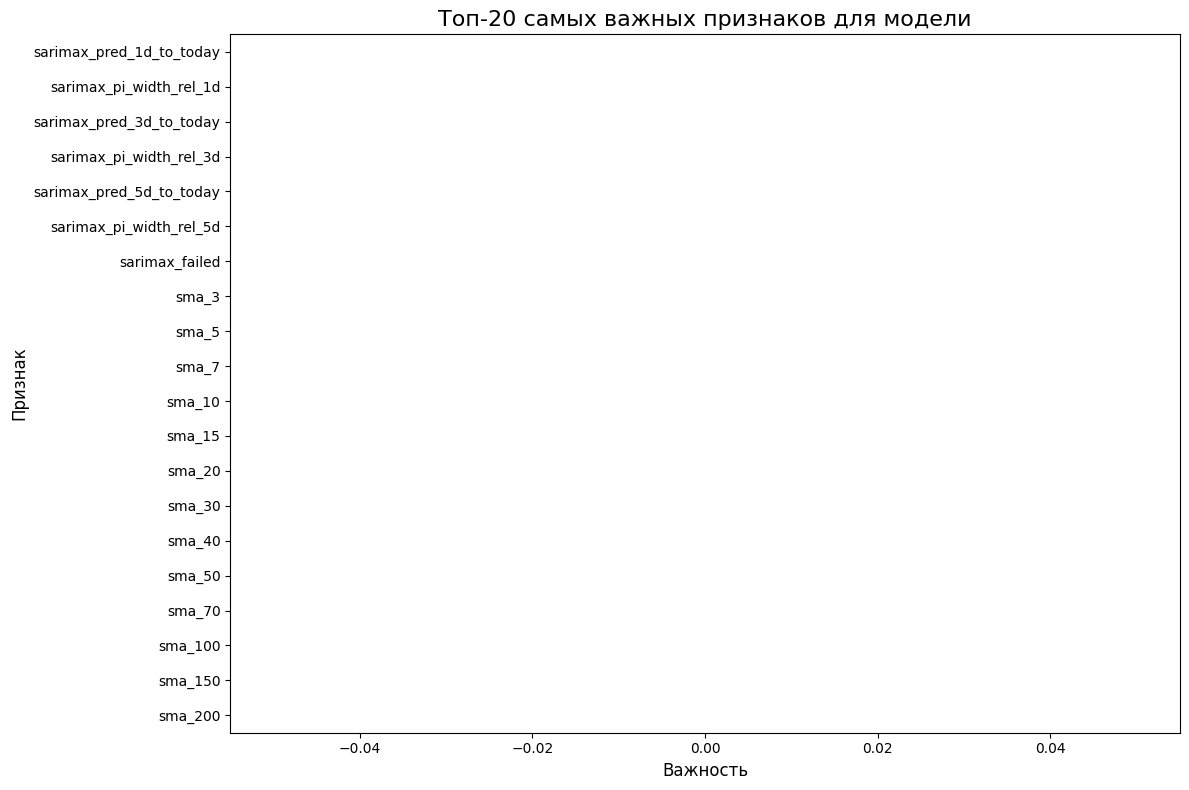

Топ-20 самых НЕ важных признаков:
              feature importance
225   close_to_ema_50       None
226           ema_100       None
227  close_to_ema_100       None
228           ema_200       None
229  close_to_ema_200       None
230           kama_30       None
231  close_to_kama_30       None
232   linreg_slope_20       None
233             roc_5       None
234            roc_10       None
235            roc_20       None
236            cci_20       None
237            mfi_14       None
238       hist_vol_20       None
239       PVO_12_26_9       None
240      PVOh_12_26_9       None
241      PVOs_12_26_9       None
242          pvt_norm       None
243   zscore_close_20       None
244        autocorr_5       None


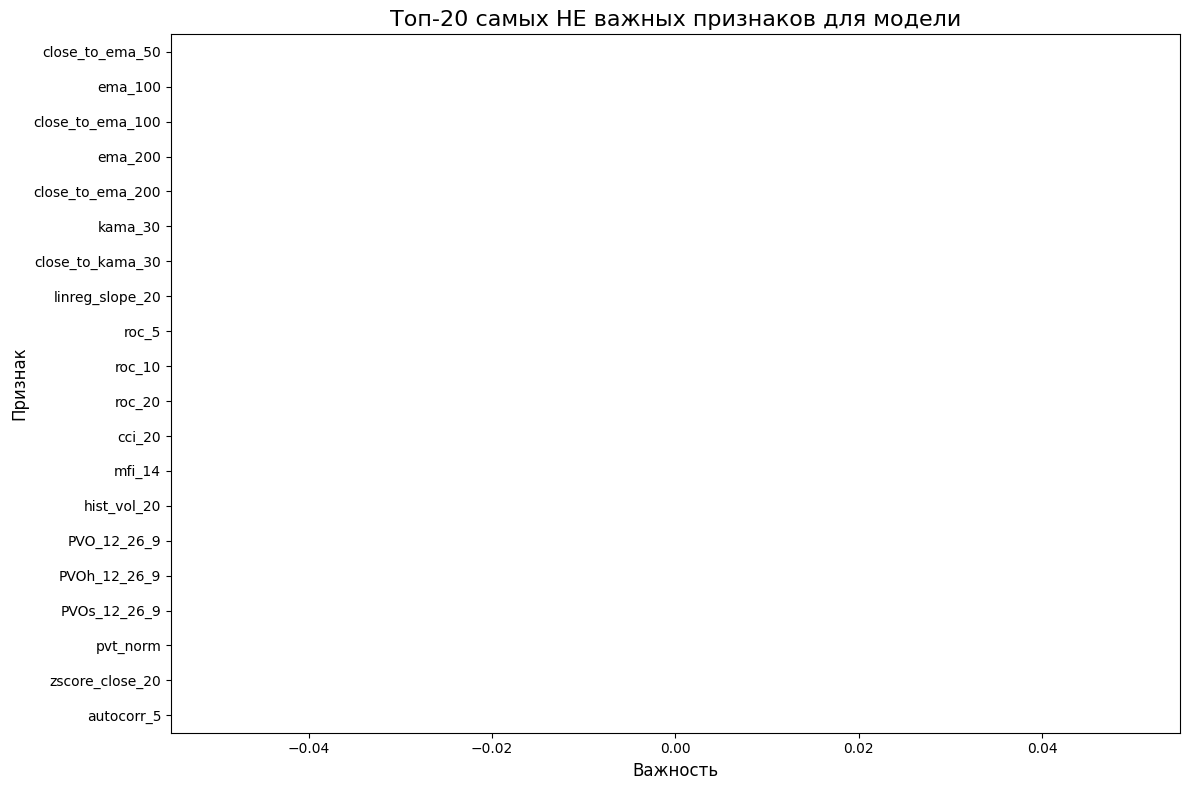

In [5]:
# --- ШАГ 4: Анализ важности признаков ---
print("\n--- Определение важности признаков ---")
print("Переобучаем модель на всех доступных данных для получения наиболее стабильной оценки...")

# # Обучаем финальную модель на всех данных

final_model = train_model_MLPClassifier(X, y)

# Создаем DataFrame с важностью признаков
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': None, #final_model.feature_importances_ # метод - Mean Decrease in Impurity (Gini Importance)
}).sort_values('importance', ascending=False)

print("Топ-20 самых важных признаков:")
print(feature_importance.head(20))

# Визуализируем важность
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20), palette='viridis')
plt.title('Топ-20 самых важных признаков для модели', fontsize=16)
plt.xlabel('Важность', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.tight_layout()
plt.show()


print("Топ-20 самых НЕ важных признаков:")
print(feature_importance.tail(20))
# Визуализируем важность
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.tail(20), palette='viridis')
plt.title('Топ-20 самых НЕ важных признаков для модели', fontsize=16)
plt.xlabel('Важность', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.tight_layout()
plt.show()


In [6]:
print("TOP-20 неважных признаков")
print(", ".join([f"'{i}'" for i in feature_importance.tail(20).feature.values]))

TOP-20 неважных признаков
'close_to_ema_50', 'ema_100', 'close_to_ema_100', 'ema_200', 'close_to_ema_200', 'kama_30', 'close_to_kama_30', 'linreg_slope_20', 'roc_5', 'roc_10', 'roc_20', 'cci_20', 'mfi_14', 'hist_vol_20', 'PVO_12_26_9', 'PVOh_12_26_9', 'PVOs_12_26_9', 'pvt_norm', 'zscore_close_20', 'autocorr_5'


In [7]:
# --- ШАГ 5: Сохранение артефактов модели ---

print("\n--- Сохранение артефактов модели ---")

output_folder = "../models/"


filename_base = model_name

# Создаем папку, если она не существует
os.makedirs(output_folder, exist_ok=True)
print(f"Артефакты будут сохранены в папку: {output_folder}")

# 1. Сохранение самой модели
model_path = os.path.join(output_folder, f"{filename_base}.joblib")
joblib.dump(final_model, model_path)
print(f"Модель сохранена в: {model_path}")

# 2. Сохранение списка признаков
features_path = os.path.join(output_folder, f"{filename_base}_features.json")
features_list = list(X.columns)
with open(features_path, 'w') as f:
    json.dump(features_list, f, indent=4)
print(f"Список признаков сохранен в: {features_path}")

# 3. Сохранение метаданных и результатов
metadata_path = os.path.join(output_folder, f"{filename_base}_metadata.json")

# Собираем все важные параметры и результаты в один словарь
metadata = {
    "model_name": model_name,
    "model_class": type(final_model).__name__,
    "training_timestamp_utc": datetime.utcnow().isoformat(),
    "target_column": TARGET_COLUMN,
    # "confidence_threshold": CONFIDENCE_THRESHOLD,
    "feature_engineering_file": "feature_engineering.py", # Указываем источник фичей
    "training_data_file": final_dataset_filename,
    "model_parameters": final_model.get_params(),
    "feature_importance": feature_importance.head(15).to_dict('records'),
    # "cross_validation_summary": results_summary.to_dict('records')
}

with open(metadata_path, 'w', encoding='utf-8') as f:
    # Используем indent=4 для красивого форматирования, ensure_ascii=False для кириллицы
    json.dump(metadata, f, indent=4, ensure_ascii=False)


# 2. Сохранение списка признаков
features_path = os.path.join(output_folder, f"{filename_base}_features.json")
features_list = list(X.columns) 
with open(features_path, 'w') as f:
    json.dump(features_list, f, indent=4)
    
print(f"Список признаков сохранен в: {features_path}")
print(f"Метаданные и результаты сохранены в: {metadata_path}")

print("\nВсе артефакты модели успешно сохранены!")


--- Сохранение артефактов модели ---
Артефакты будут сохранены в папку: ../models/
Модель сохранена в: ../models/MLP_tbm10d.joblib
Список признаков сохранен в: ../models/MLP_tbm10d_features.json
Список признаков сохранен в: ../models/MLP_tbm10d_features.json
Метаданные и результаты сохранены в: ../models/MLP_tbm10d_metadata.json

Все артефакты модели успешно сохранены!
